## Data Preparation and Model Import
Initial setup including importing required libraries and loading the balanced training data and testing data.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


# Read the data
training_data_smote = pd.read_csv('training_balanced_smote.csv')
testing_data = pd.read_csv('testing_data.csv')# Importing necessary libraries

## Original Model Training and Evaluation
Training the initial logistic regression model on the balanced data and evaluating its performance.

In [23]:
# Separate features and target variable from training data
X_train = training_data_smote.drop("y", axis=1)
y_train_smote = training_data_smote["y"]

# Separate features and target variable from testing data
X_test = testing_data.drop("y", axis=1)
y_test = testing_data["y"]

# Initialize the Logistic Regression model
model = RandomForestClassifier(
    max_depth=30,
    max_features=0.1,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=83,
    random_state=42
)

# Train the model
model.fit(X_train, y_train_smote)

# Make predictions on the testing data
y_pred_smote = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_smote)
report = classification_report(y_test, y_pred_smote)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.98      0.68        50
         1.0       0.80      0.08      0.15        50

    accuracy                           0.53       100
   macro avg       0.66      0.53      0.41       100
weighted avg       0.66      0.53      0.41       100



## New Model Training and Evaluation
Training a new model on different training data and comparing its performance.

In [22]:
# Read the new training data
training_data = pd.read_csv('training_data.csv')

# Separate features and target variable from the new training data
X_train_new = training_data.drop('y', axis=1)
y_train_new = training_data['y']

model = RandomForestClassifier(    
    max_depth=30,
    max_features=0.1,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=83,
    random_state=42,
)
# Train the model with the new training data
model.fit(X_train_new, y_train_new)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model with the new training data
accuracy_new = accuracy_score(y_test, y_pred)
report_new = classification_report(y_test, y_pred)

print(f'New Accuracy: {accuracy_new}')
print('New Classification Report:')
print(report_new)

New Accuracy: 0.5
New Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        50
         1.0       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

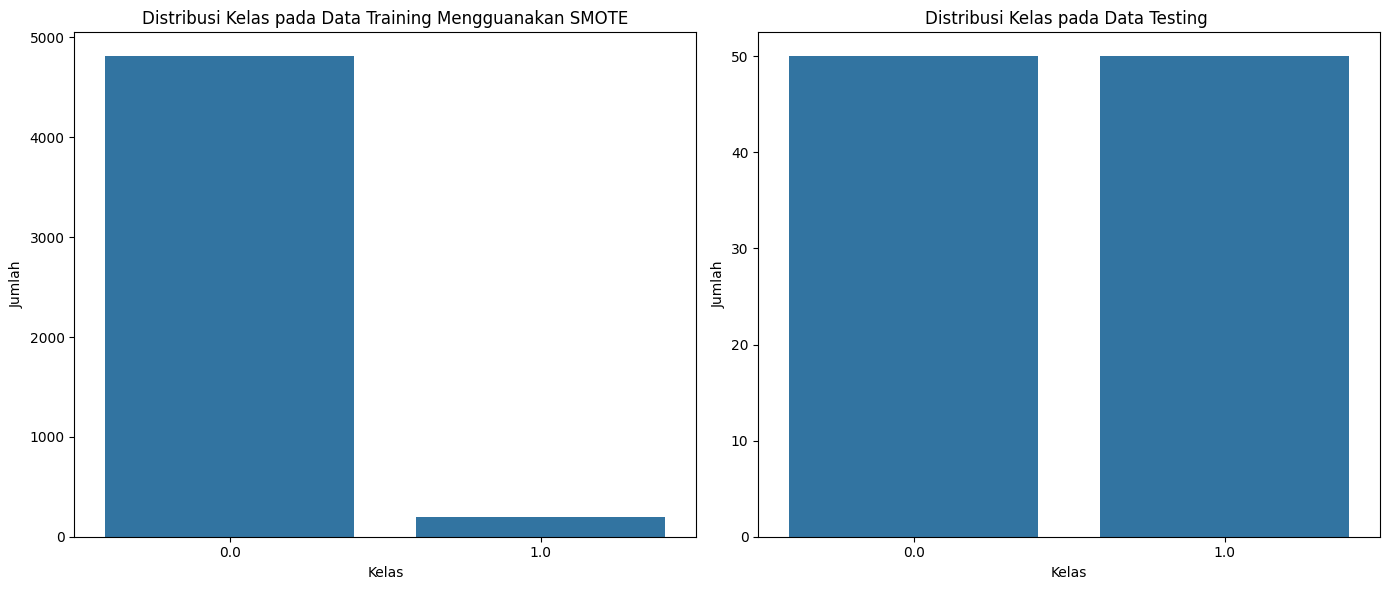

In [21]:
# Visualisasi distribusi kelas pada data training dan testing
plt.figure(figsize=(14, 6))

# Distribusi kelas pada data training
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_new)
plt.title('Distribusi Kelas pada Data Training Mengguanakan SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

# Distribusi kelas pada data testing
plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Distribusi Kelas pada Data Testing ')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

## Model Performance Visualization
Generating and plotting ROC curves to compare the performance of both models:

- Calculates ROC curves and AUC scores
- Visualizes discrimination ability of both models
- Plots true positive rate vs false positive rate

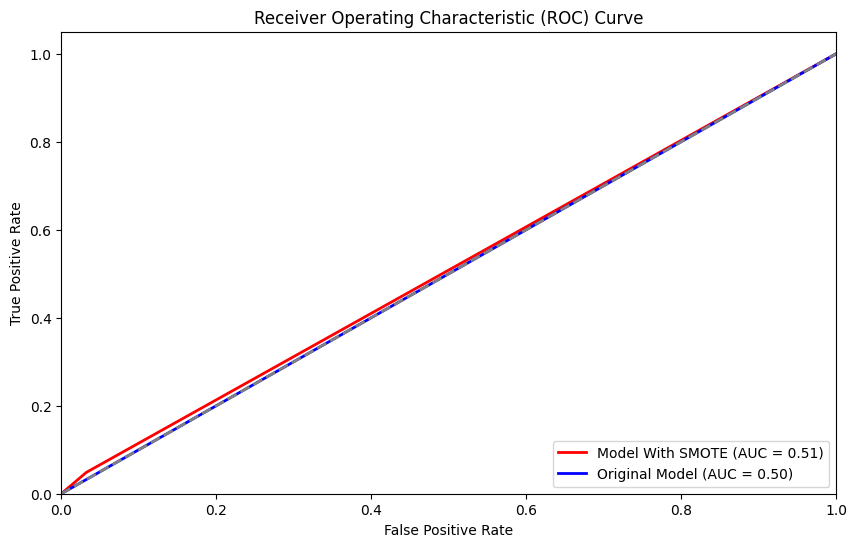

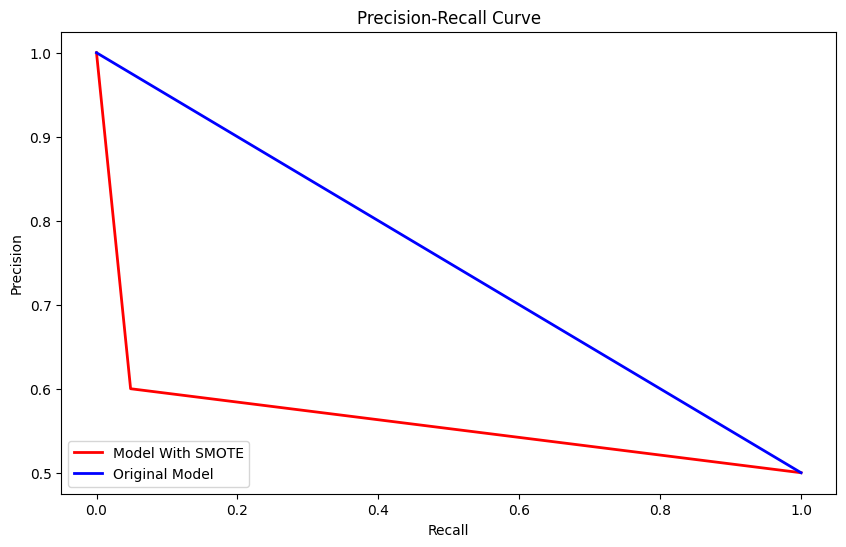

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

# Calculate ROC curve and AUC for the original model
fpr, tpr, _ = roc_curve(y_test, y_pred_smote)
roc_auc = auc(fpr, tpr)

# Calculate ROC curve and AUC for the new model
fpr_new, tpr_new, _ = roc_curve(y_test, y_pred)
roc_auc_new = auc(fpr_new, tpr_new)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'Model With SMOTE (AUC = {roc_auc:.2f})')
plt.plot(fpr_new, tpr_new, color='blue', lw=2, label=f'Original Model (AUC = {roc_auc_new:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting the Precision-Recall curves

precision, recall, _ = precision_recall_curve(y_test, y_pred_smote)
precision_new, recall_new, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='red', lw=2, label='Model With SMOTE')
plt.plot(recall_new, precision_new, color='blue', lw=2, label='Original Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# catatan buat kawan-kawan

### ROC (Receiver Operating Characteristic) Curve
Bayangkan kamu adalah seorang penjaga pintu di sebuah pesta. Tugasmu adalah memutuskan siapa yang boleh masuk (positif) dan siapa yang tidak boleh masuk (negatif) berdasarkan undangan mereka.

- **True Positive (TP)**: Kamu membiarkan orang yang diundang masuk.
- **False Positive (FP)**: Kamu membiarkan orang yang tidak diundang masuk.
- **True Negative (TN)**: Kamu tidak membiarkan orang yang tidak diundang masuk.
- **False Negative (FN)**: Kamu tidak membiarkan orang yang diundang masuk.

ROC Curve adalah grafik yang menunjukkan seberapa baik kamu melakukan tugas ini pada berbagai tingkat toleransi. Grafik ini menunjukkan hubungan antara:
- **True Positive Rate (TPR)**: Persentase orang yang diundang yang kamu biarkan masuk (juga disebut sensitivitas).
- **False Positive Rate (FPR)**: Persentase orang yang tidak diundang yang kamu biarkan masuk.

Dengan kata lain, ROC Curve menunjukkan seberapa baik kamu bisa membedakan antara orang yang diundang dan yang tidak diundang pada berbagai tingkat toleransi.

### AUC (Area Under the Curve)
AUC adalah ukuran dari seberapa baik ROC Curve kamu. Ini adalah area di bawah ROC Curve.

- **AUC = 1**: Kamu sempurna dalam membedakan antara orang yang diundang dan yang tidak diundang.
- **AUC = 0.5**: Kamu sama sekali tidak lebih baik dari menebak secara acak.
- **AUC < 0.5**: Kamu lebih buruk dari menebak secara acak (mungkin kamu membiarkan lebih banyak orang yang tidak diundang masuk daripada yang diundang).

Jadi, AUC memberi kamu satu angka yang merangkum seberapa baik kamu melakukan tugasmu sebagai penjaga pintu. Semakin tinggi AUC, semakin baik kamu dalam membedakan antara orang yang diundang dan yang tidak diundang.

### PRC (Precision-Recall Curve)
Bayangkan kamu masih seorang penjaga pintu di sebuah pesta, dan tugasmu adalah memutuskan siapa yang boleh masuk (positif) dan siapa yang tidak boleh masuk (negatif) berdasarkan undangan mereka.

- **True Positive (TP)**: Kamu membiarkan orang yang diundang masuk.
- **False Positive (FP)**: Kamu membiarkan orang yang tidak diundang masuk.
- **False Negative (FN)**: Kamu tidak membiarkan orang yang diundang masuk.

PRC adalah grafik yang menunjukkan seberapa baik kamu melakukan tugas ini dengan fokus pada dua metrik:
- **Precision (Presisi)**: Persentase orang yang kamu biarkan masuk yang benar-benar diundang. Ini mengukur seberapa tepat keputusanmu.
  \[
  \text{Precision} = \frac{TP}{TP + FP}
  \]
- **Recall (Sensitivitas)**: Persentase orang yang diundang yang kamu biarkan masuk. Ini mengukur seberapa baik kamu menemukan semua orang yang diundang.
  \[
  \text{Recall} = \frac{TP}{TP + FN}
  \]

Dengan kata lain, PRC menunjukkan hubungan antara presisi dan recall pada berbagai tingkat toleransi.

### Mengapa PRC Penting?
PRC sangat berguna ketika kamu memiliki dataset yang tidak seimbang, yaitu ketika jumlah orang yang diundang (positif) jauh lebih sedikit dibandingkan dengan jumlah orang yang tidak diundang (negatif). Dalam kasus seperti ini, ROC Curve mungkin memberikan gambaran yang terlalu optimis tentang kinerja modelmu. PRC, di sisi lain, memberikan gambaran yang lebih akurat tentang seberapa baik modelmu dalam menemukan orang yang diundang tanpa terlalu banyak membiarkan orang yang tidak diundang masuk.

### Contoh Sederhana
Bayangkan kamu memiliki 100 orang di luar pintu:
- 10 orang diundang (positif).
- 90 orang tidak diundang (negatif).

Jika kamu membiarkan 20 orang masuk dan 8 dari mereka diundang (TP = 8) dan 12 tidak diundang (FP = 12), maka:
- **Precision**: 8 / (8 + 12) = 8 / 20 = 0.4 (40%)
- **Recall**: 8 / (8 + 2) = 8 / 10 = 0.8 (80%)

PRC akan menunjukkan bagaimana precision dan recall berubah saat kamu mengubah toleransi atau kriteria untuk membiarkan orang masuk.

Dengan demikian, PRC membantu kamu memahami trade-off antara precision dan recall, dan seberapa baik kamu bisa menjaga keseimbangan antara membiarkan orang yang diundang masuk dan tidak membiarkan orang yang tidak diundang masuk.